<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/MachineLearning_ALgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is dedicated to practising different Machine learning Algorithms**

The alogrithms are in the order:


*   Unsupervised Learning


1. K-means clustering

**Unsupervised Learning**

**K-Means clustering**

Article: https://realpython.com/k-means-clustering-python/

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [24]:
# Creating random data for salary clustering

incomeDF = {
    'Name': ['Kartikay', 'Mayank', 'Dileep', 'Saroj', 'Alika', 'Shruti', 'Reshmi', 'Robin', 'Dhananjay', 'Monu', 'Jijaji'],
    'Age': [30, 29, 60, 60, 24, 30, 28, 30, 65, 35, 35],
    'Income($)': [3000, 3000, 150000, 130000, 5000, 4000, 4500, 5000, 200000, 70000, 80000]
}

IncomeData = pd.DataFrame(incomeDF)

In [25]:
IncomeData.head()

,Name,Age,Income($)
0,Kartikay,30,3000
1,Mayank,29,3000
2,Dileep,60,150000
3,Saroj,60,130000
4,Alika,24,5000


Text(0, 0.5, 'Income($)')

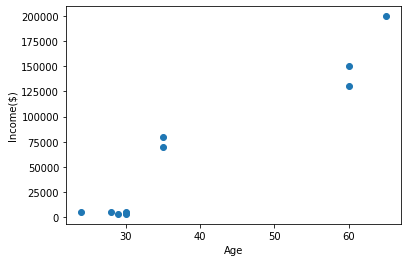

In [26]:
plt.scatter(IncomeData['Age'], IncomeData['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [27]:
# We can see from above plot that there may be 3 clusters i.e, ~30, ~35, ~60
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(IncomeData[ ['Age', 'Income($)'] ])
y_predicted

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2], dtype=int32)

In [28]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,30,3000,1
1,Mayank,29,3000,1
2,Dileep,60,150000,0
3,Saroj,60,130000,0
4,Alika,24,5000,1
5,Shruti,30,4000,1
6,Reshmi,28,4500,1
7,Robin,30,5000,1
8,Dhananjay,65,200000,0
9,Monu,35,70000,2


In [29]:
km.cluster_centers_

array([[6.16666667e+01, 1.60000000e+05],
       [2.85000000e+01, 4.08333333e+03],
       [3.50000000e+01, 7.50000000e+04]])

In [30]:
# Creating 3 different df for different clusters
clusterDF0 = IncomeData[IncomeData.Cluster == 0]
clusterDF1 = IncomeData[IncomeData.Cluster == 1]
clusterDF2 = IncomeData[IncomeData.Cluster == 2]

Text(0, 0.5, 'Income($)')

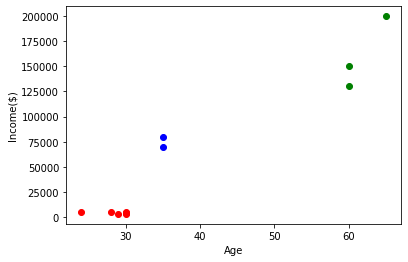

In [33]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [34]:
# Remember: if there are values that don't fit in green, red, blue change values in range 0-1 using MinMax Scalar - read.

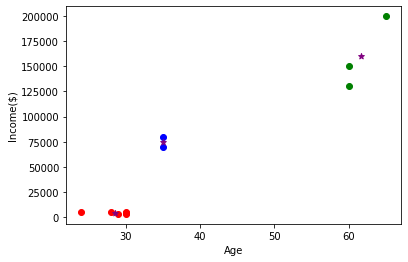

In [37]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')


# plotting the center of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*')

In [38]:
sse = []

k_rng = range(1,10)

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(IncomeData[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [39]:
# sum of squared error
sse

[51861502278.18182,
 10197968857.541666,
 2654208377.5,
 254208360.83333334,
 54208360.833333336,
 4208360.833333334,
 687524.5,
 125020.5,
 18.5]

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. 

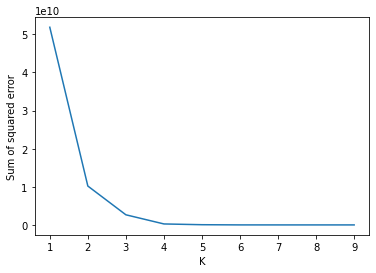

In [40]:
# elbow plot - elbow is the most appropriate value to start with - here it is 3

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [47]:
# The lowest SSE value
print(km.inertia_)
# Final locations of the centroid
# print(km.cluster_centers_)
# The number of iterations required to converge
print(km.n_iter_)
# predicted labels 
print(km.labels_)

18.5
1
[0 0 4 1 6 7 8 6 3 2 5]


In [48]:
IncomeData[IncomeData['Cluster'] == 2]

,Name,Age,Income($),Cluster
9,Monu,35,70000,2
10,Jijaji,35,80000,2


In [49]:
IncomeData[IncomeData['Cluster'] == 3]

,Name,Age,Income($),Cluster


In [50]:
IncomeData[IncomeData['Cluster'] == 0]

,Name,Age,Income($),Cluster
2,Dileep,60,150000,0
3,Saroj,60,130000,0
8,Dhananjay,65,200000,0
